# Kaggle Housing Prices Regression

In [1]:
# Import modules
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Data manipulation

In [2]:
# Load in data
datapath = os.path.join(os.getcwd(), 'train.csv')
data = pd.read_csv(datapath)

In [3]:
# Check data
print(data.shape)
data.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Extract features
testdata = data.drop(['SalePrice', 'Id'], axis = 1)

In [5]:
# Check features
print(testdata.shape)

(1460, 79)


In [6]:
print(testdata)
testdata.head(10)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   P

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [47]:
# Create target
datatarget = data['SalePrice']

In [48]:
# Check y
print(datatarget.shape)
datatarget.head(5)

(1460,)


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [49]:
# Checking for NaN values in testdata and datatarget
print("Checking for NaN values in SalePrice... Number of NaN values:")
print(datatarget.isna().sum())
print("Checking for NaN values in testdata... Number of NaN values:")
print(testdata.isna().sum())
print("Checking for other NaN values in testdata... Number of NaN values:")
print(testdata.loc[:,'BsmtQual':'HalfBath'].isna().sum())

Checking for NaN values in SalePrice... Number of NaN values:
0
Checking for NaN values in X... Number of NaN values:
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
Ga

In [81]:
# Replace NaN values in columns in NaN values

# LotFrontage = 0
X["LotFrontage"].fillna(value=0, inplace=True)
# Alley = 'None'
X["Alley"].fillna('None', inplace=True)
# MasVnrType, Area = 'None', 0
X["MasVnrType"].fillna('None', inplace=True)
X["MasVnrArea"].fillna(0, inplace=True)
# BsmtQual, Cond, Exposure, FinType1, FinType2 = 'None'
X["BsmtQual"].fillna('None', inplace=True)
X["BsmtCond"].fillna('None', inplace=True)
X["BsmtExposure"].fillna('None', inplace=True)
X["BsmtFinType1"].fillna('None', inplace=True)
X["BsmtFinType2"].fillna('None', inplace=True)
# FireplaceQu = 'None'
X["FireplaceQu"].fillna('None', inplace=True)
# GarageType, YrBlt, Finish, Qual, Cond = 'None'
X["GarageType"].fillna('None', inplace=True)
X["GarageYrBlt"].fillna('None', inplace=True)
X["GarageFinish"].fillna('None', inplace=True)
X["GarageQual"].fillna('None', inplace=True)
X["GarageCond"].fillna('None', inplace=True)
# PoolQC = 'None'
X["PoolQC"].fillna('None', inplace=True)
# Fence = 'None'
X["Fence"].fillna('None', inplace=True)
# MiscFeature = 'None'
X["MiscFeature"].fillna('None', inplace=True)
# Electrical = 'None'
X["Electrical"].fillna('None', inplace=True)

In [82]:
# Rechecking for NaN values in X and y
print("Checking for NaN values in X... Number of NaN values:")
print(X.isna().sum())
print("Checking for other NaN values in X... Number of NaN values:")
print(X.loc[:,'BsmtQual':'HalfBath'].isna().sum())

Checking for NaN values in X... Number of NaN values:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch  

In [83]:
print(X.shape)
X_1hot = pd.get_dummies(X)
print(X_1hot.shape)

(1460, 79)
(1460, 400)


## 2. Model training and Prediction

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_1hot, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [85]:
reg = LinearRegression().fit(X_train, y_train)

In [97]:
# reg.coef_

In [87]:
prediction = reg.predict(X_test)

In [102]:
pred_data = pd.DataFrame(prediction)
print(pred_data.head(15))

               0
0   2.583669e+05
1   1.563622e+05
2   1.027494e+05
3   2.062444e+05
4   8.809330e+04
5   7.607741e+04
6   2.542254e+05
7   1.209491e+05
8   4.807175e+05
9   1.489057e+05
10  2.066528e+05
11  4.991820e+08
12  2.374929e+05
13  1.114490e+05
14  1.099134e+05


In [96]:
# y_test

In [114]:
diff = prediction - y_test
# print(diff)
print(y_test.mean())
print(prediction.mean())

181370.38356164383
8157056.977514463


## 3. Data Visualisation

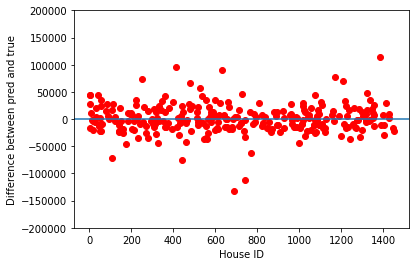

In [109]:
plt.plot(diff, 'ro')
plt.xlabel('House ID')
plt.ylabel('Difference between pred and true')
plt.axhline(y=0)
plt.ylim(-200000, 200000)
plt.show()

NameError: name 'ylim' is not defined

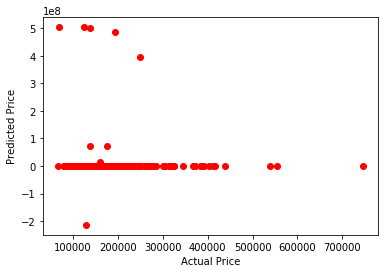

In [111]:
plt.plot(y_test, prediction, 'ro')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
ylim(20000, 20000)
plt.show()

In [110]:
# Mean square error
mean_squared_error(y_test, prediction)

4120196309236715.0

## 4. csv file output

In [ ]:
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_forest_prediction_1, PassengerId, columns = ["Survived"])
print(my_solution)